# Plots and analysis

## Imports

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

In [3]:
df = pd.read_pickle("data/df")

## Comparing means of LDL and HL between HA and control across frequencies
- T-test LDL per group per frequency
- LDL mean per group per frequency (pointplot)
- LDL mean per group per frequency (boxplot)
- T-test HL per group per frequency
- HL mean per group per frequency (pointplot)
- HL mean per group per frequency (boxplot)

### Preprocessing for this area

In [4]:
df = df[
    [
        "Código de participante",
        "Group",
        "TWI",
        "OPI",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
        "Avg_LDL",
        "Avg_HL_L",
        "Avg_HL_R",
        "Avg_HL",
    ]
]

Cannot run with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [5]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
38,AC32,HA,156.353259,0.540000,100.0,110.0,110.0,110.0,110.0,100.0,...,25.0,25.0,25.0,10.0,10.0,15.0,106.666667,17.500000,18.333333,18.333333
8,AC02,HA,100.299235,0.293333,80.0,100.0,85.0,85.0,85.0,90.0,...,10.0,5.0,10.0,5.0,10.0,15.0,87.500000,9.166667,11.666667,9.166667
52,GC003,Control,270.643289,0.493333,80.0,100.0,105.0,110.0,85.0,100.0,...,10.0,10.0,15.0,30.0,10.0,10.0,96.666667,15.833333,14.166667,14.166667
27,AC21,HA,135.635317,0.320000,80.0,75.0,95.0,90.0,90.0,95.0,...,0.0,-5.0,0.0,0.0,-5.0,5.0,87.500000,-0.833333,0.833333,-0.833333
25,AC19,HA,142.467822,0.486667,50.0,60.0,60.0,50.0,30.0,30.0,...,-5.0,0.0,0.0,0.0,0.0,0.0,46.666667,1.666667,-0.833333,-0.833333
14,AC08,HA,114.249866,0.306667,80.0,75.0,75.0,80.0,80.0,65.0,...,5.0,0.0,0.0,0.0,5.0,-10.0,75.833333,0.000000,2.500000,0.000000
17,AC11,HA,121.067219,0.140000,65.0,90.0,90.0,90.0,90.0,80.0,...,10.0,10.0,5.0,10.0,15.0,-5.0,84.166667,7.500000,9.166667,7.500000
40,AC34,HA,101.080018,0.146667,60.0,70.0,80.0,50.0,45.0,25.0,...,0.0,0.0,5.0,5.0,0.0,-10.0,55.000000,0.000000,2.500000,0.000000
37,AC31,HA,212.152853,0.033333,80.0,80.0,85.0,80.0,75.0,65.0,...,5.0,5.0,0.0,5.0,5.0,-5.0,77.500000,2.500000,5.833333,2.500000
23,AC17,HA,208.416911,0.606667,45.0,55.0,65.0,45.0,60.0,40.0,...,10.0,10.0,15.0,5.0,10.0,0.0,51.666667,9.166667,8.333333,8.333333


### Loudness Discomfort Level (LDL) between groups

#### Preprocessing for these plots

In [6]:
df_pointplots = df[
    [
        "Código de participante",
        "Group",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
    ]
]

In [7]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_ldl

,Código de participante,variable,value,Group
0,AC01,LDL_250,60.0,HA
1,AC02,LDL_250,80.0,HA
2,AC03,LDL_250,80.0,HA
3,AC05,LDL_250,80.0,HA
4,AC06,LDL_250,80.0,HA
...,...,...,...,...
13,GC003,LDL_4000,85.0,Control
14,GC008,LDL_4000,25.0,Control
15,GC001,LDL_8000,20.0,Control
16,GC003,LDL_8000,100.0,Control


In [8]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "Frequency", "Db", "Group"]

#### T tests

In [9]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [10]:
df_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_Control = df_pointplots[df_pointplots["Group"] == "Control"]

freqs = ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))

t test for LDL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.365346,2.309343,two-sided,0.289907,"[-31.7, 67.32]",1.191645,0.845,0.431416


t test for LDL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.931724,2.255034,two-sided,0.440126,"[-55.49, 90.69]",0.865837,0.634,0.254909


t test for LDL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.923403,2.271416,two-sided,0.443094,"[-54.39, 88.77]",0.841116,0.631,0.243255


t test for LDL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.78033,2.260345,two-sided,0.508598,"[-72.79, 109.66]",0.720382,0.588,0.19092


t test for LDL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.585964,2.521664,two-sided,0.227648,"[-37.59, 98.22]",1.159255,1.015,0.41247


t test for LDL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.954273,2.227894,two-sided,0.431687,"[-80.91, 133.2]",0.918834,0.642,0.280884


#### Plots

/tmp/ipykernel_10845/638573422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


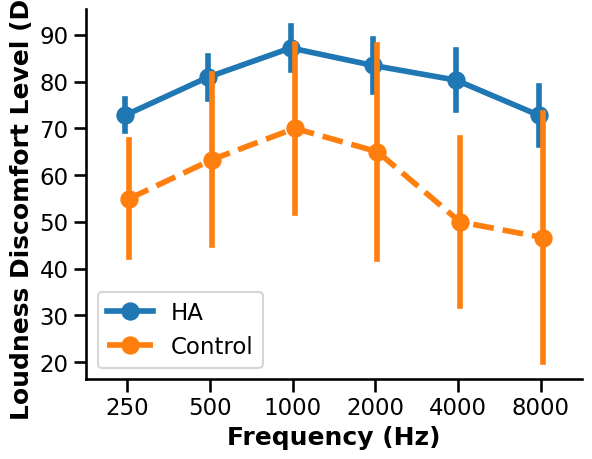

In [11]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_ldl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_10845/3367796261.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


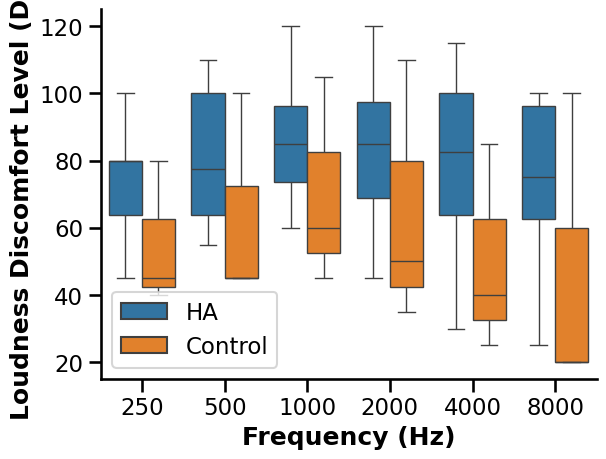

In [12]:
sns.set_context("talk")
fig = sns.boxplot(
    data=df_pointplots_ldl, x="Frequency", y="Db", hue="Group", dodge=True
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

### Hearing Level (HL) between groups

#### Preprocessing
dataset must be in melt form

In [13]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [14]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_hl

,Código de participante,variable,value,Group
0,AC01,HL_250,10.0,HA
1,AC02,HL_250,10.0,HA
2,AC03,HL_250,10.0,HA
3,AC05,HL_250,5.0,HA
4,AC06,HL_250,5.0,HA
...,...,...,...,...
13,GC003,HL_4000,10.0,Control
14,GC008,HL_4000,5.0,Control
15,GC001,HL_8000,-10.0,Control
16,GC003,HL_8000,10.0,Control


In [15]:
df_pointplots_hl.columns = ["ID", "Frequency", "Db", "Group"]

#### T-tests

In [16]:
df_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_Control = df_pointplots[df_pointplots["Group"] == "Control"]

freqs = ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))

t test for HL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.222497,6.910984,two-sided,0.830359,"[-5.03, 6.07]",0.083268,0.498,0.051793


t test for HL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.462778,3.676307,two-sided,0.669576,"[-8.15, 11.27]",0.2298,0.523,0.06375


t test for HL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.469668,2.562814,two-sided,0.675607,"[-16.2, 21.2]",0.334428,0.524,0.079352


t test for HL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.711568,2.078065,two-sided,0.548108,"[-45.56, 32.23]",0.907878,0.57,0.275407


t test for HL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.359211,2.447784,two-sided,0.748122,"[-15.17, 18.51]",0.276725,0.51,0.070004


t test for HL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.080029,2.74045,two-sided,0.941694,"[-21.35, 22.39]",0.051853,0.492,0.050695


#### Plots

/tmp/ipykernel_10845/504455651.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


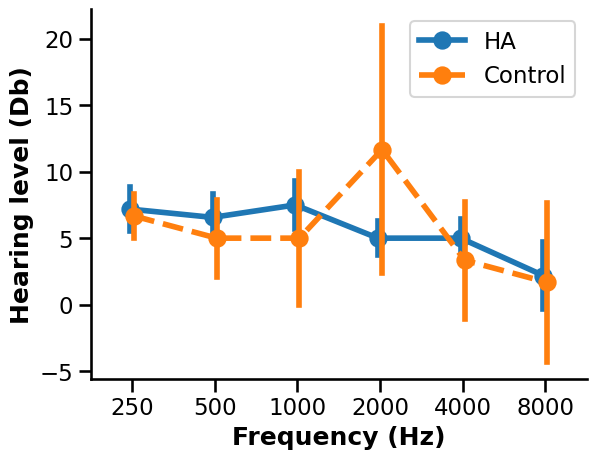

In [17]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_10845/3291600568.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


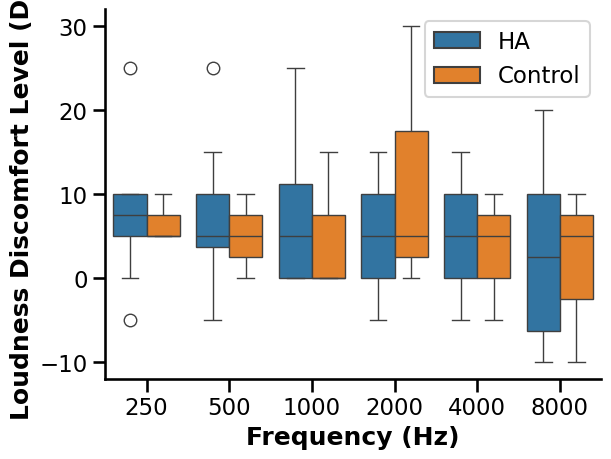

In [18]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_hl, x="Frequency", y="Db", hue="Group")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

## Comparing means of OPI and TWI between HA and control
- T-test OPI per group
- OPI per group (boxplot)
- T-test TWI per group
- TWI per group (boxplot)

In [19]:
df = pd.read_pickle("data/df")

In [20]:
df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]

measurement = "OPI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for OPI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.511534,3.506251,two-sided,0.639482,"[-0.52, 0.37]",0.375028,0.491,0.101065


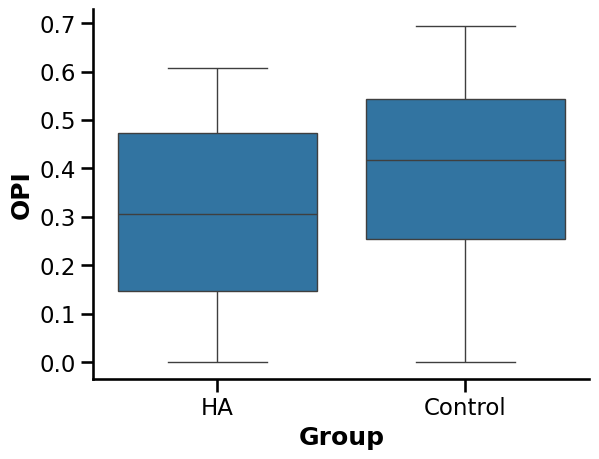

In [21]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

In [22]:
measurement = "TWI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for TWI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.976724,2.133406,two-sided,0.426147,"[-225.22, 137.78]",1.057844,0.645,0.37109


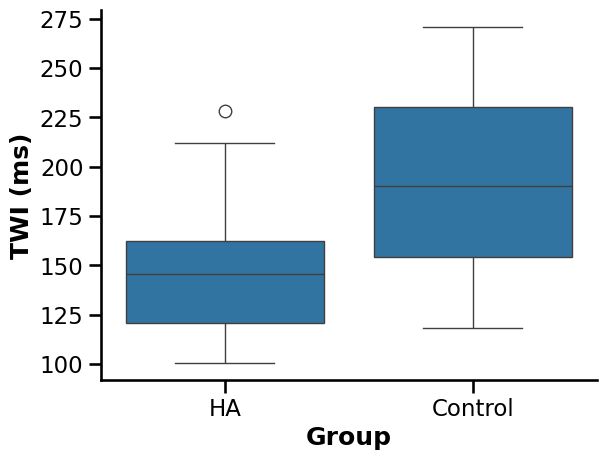

In [23]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

## Compare differences between AQ scoring between experimental and control
No significant differences

In [24]:
df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]


print("t test for AQ score")
display(pg.ttest(df_HA["AQ_TOTAL"], df_Control["AQ_TOTAL"]))

t test for AQ score


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.580856,3.43514,two-sided,0.597281,"[-2.92, 4.34]",0.423998,0.499,0.118275


## Group Sigmoid plot

### Preprocessing

In [4]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_ha")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [5]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

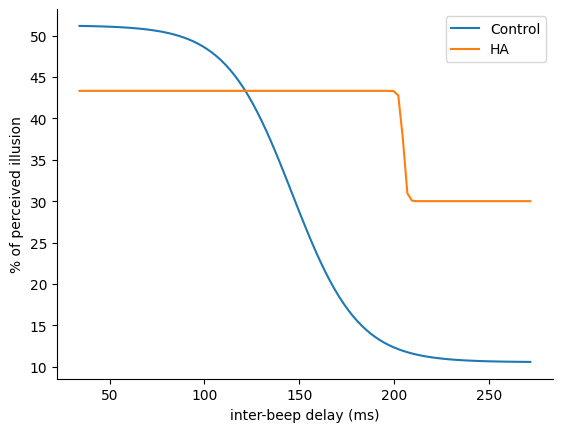

In [6]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="Control")
fig = sns.lineplot(data=df_ha, x="x", y="y", label="HA")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.show()